### Importing necessary Libraries

In [1]:
# Setting up the workspace by importing all of the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, confusion_matrix,f1_score, recall_score, precision_score, make_scorer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import svm


Using TensorFlow backend.


### Creating a function to display a Confusion Matrix

In [2]:
def cm(y_real, y_pred, t='test'):
    """
    This function creates a confusion matrix with the given paramaters.
    y_real: known data from test or train.
    y_pred: predicted data
    t: Title of the matrix
    """
    cf = confusion_matrix(y_real, y_pred)
    print(f"Confusion Matrix {t}: ")
    akws = {"ha": 'center',"va": 'top'}
    sns.heatmap(cf/(np.sum(cf)),annot=True, fmt='0.2%',cmap='Blues', annot_kws=akws, cbar=False)

    akws = {"ha": 'center',"va": 'bottom'}
    sns.heatmap(cf,annot=True, fmt='0',cmap='Blues', annot_kws=akws)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Creating a function to get labels from a model

In [3]:
def get_label(model=None, test_data=None, thresh=0.50):
    labels = []
    test_preds = model.predict_proba(test_data)
    for test_pred in test_preds:
        if test_pred[1]>=thresh:
            labels.append(1)
        else:
            labels.append(0)
    return np.array(labels)

### Loading in the Data Set

In [4]:
df = pd.read_csv('DIQ010_Target.csv')
df.head()

id         WTDRD1         WTDR2D  DR1DRSTZ  DRABF  DRDINT  DR1DAY  \
0  73557   16888.327864   12930.890649         1    2.0     2.0     2.0   
1  73558   17932.143865   12684.148869         1    2.0     2.0     1.0   
2  73559   59641.812930   39394.236709         1    2.0     2.0     6.0   
3  73560  142203.069917  125966.366442         1    2.0     2.0     3.0   
4  73561   59052.357033   39004.892993         1    2.0     2.0     1.0   

   DBQ095Z  DBD100  DRQSPREP   ...    DRD370R  DRD370RQ  DRD370S  DRD370SQ  \
0      3.0     2.0       4.0   ...        0.0       0.0      0.0       0.0   
1      1.0     2.0       3.0   ...        2.0       0.0      2.0       0.0   
2      1.0     1.0       2.0   ...        0.0       0.0      0.0       0.0   
3      1.0     1.0       3.0   ...        0.0       0.0      0.0       0.0   
4      4.0     0.0       4.0   ...        2.0       0.0      2.0       0.0   

   DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  DIQ010  
0      0.0       0.0      0.0       0.0      0.0     1.0  
1      2.0       0.0      2.0       0.0      2.0     1.0  
2      0.0       0.0      0.0       0.0      0.0     1.0  
3      0.0       0.0      0.0       0.0      0.0     0.0  
4      2.0       0.0      2.0       0.0      2.0     0.0  

[5 rows x 164 columns]

In [5]:
# in a preliminary model 'id' caused some data leakage so we removed it here.
df.drop(['id'], axis=1, inplace=True)

In [6]:
df.DIQ010.value_counts()

0.0    8392
1.0     888
Name: DIQ010, dtype: int64

#### Creating a Train and Test Split

In [7]:
X = df.drop(['DIQ010'], axis=1)
y = df['DIQ010']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=81)

#### Checking for imbalance

In [9]:
y_train.value_counts()


0.0    6729
1.0     695
Name: DIQ010, dtype: int64

### Using SMOTE to balance the training data set

In [10]:
sm = SMOTE(n_jobs=-1, k_neighbors=3)

In [11]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

### Run a preliminary model using Random Forest

In [12]:
rf = RandomForestClassifier()

In [13]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
train_pred = rf.predict(X_train_sm)
test_pred = rf.predict(X_test)

Confusion Matrix test: 


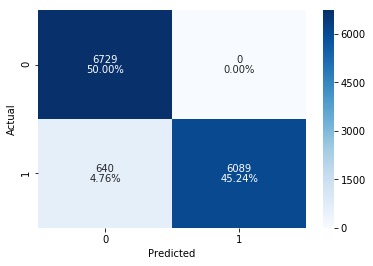

In [15]:
cm(y_train_sm, train_pred)

In [16]:
print('Accuracy: ', precision_score(y_train_sm, train_pred))

Accuracy:  1.0


Confusion Matrix test: 


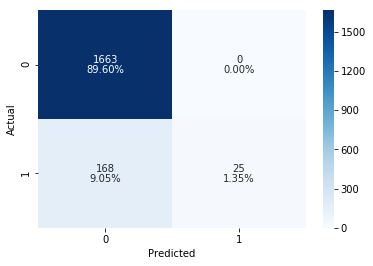

In [17]:
cm(y_test, test_pred)

In [18]:
print('Accuracy: ', precision_score(y_test, test_pred))

Accuracy:  1.0


In [19]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
train_pred = rf.predict(X_train)
train_pred_sm = rf.predict(X_train_sm)
test_pred = rf.predict(X_test)

Confusion Matrix test: 


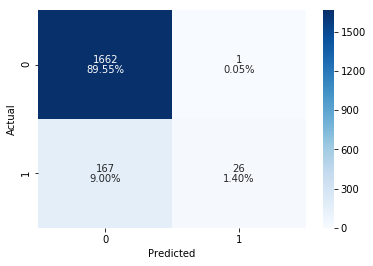

In [21]:
cm(y_test, test_pred)

In [22]:
print('Accuracy: ', precision_score(y_test, test_pred))

Accuracy:  0.9629629629629629


Confusion Matrix test: 


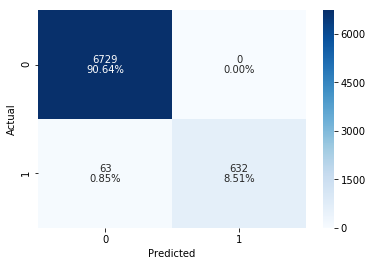

In [23]:
cm(y_train, train_pred)

In [24]:
print('Accuracy: ', precision_score(y_train, train_pred))

Accuracy:  1.0


Confusion Matrix test: 


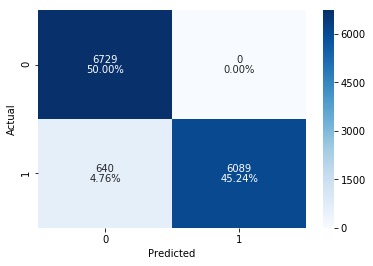

In [25]:
cm(y_train_sm, train_pred_sm)

In [26]:
print('Accuracy: ', precision_score(y_train_sm, train_pred_sm))

Accuracy:  1.0


### Random Forest classifier is optimizing accuracy.  We will be better served optimizing for recall.

# Finding the best model using recall as a metric

#### Performing a GridSearch to find the best parameters for this model

In [27]:
rf = RandomForestClassifier()

params = {"n_estimators":[10, 20, 50, 100],
          "criterion": ["entropy", "gini"],
          "max_depth": [1, 2, 5, 10],
          "min_samples_split": [0, 1, 2, 3]}

clf = GridSearchCV(rf, params, scoring=make_scorer(recall_score))

In [28]:
clf.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [29]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [31]:
rf2 = RandomForestClassifier(n_estimators=10, max_depth=1, criterion='gini', min_samples_split=2)

In [32]:
rf2.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Make predictions using the parameters

In [33]:
train_pred2 = rf2.predict(X_train)
train_pred_sm = rf2.predict(X_train_sm)
test_pred2 = rf2.predict(X_test)

#### Check the performance with a confusion matrix

Confusion Matrix test: 


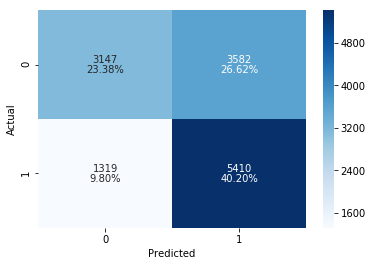

In [34]:
cm(y_train_sm, train_pred_sm)

In [35]:
print(classification_report(y_train_sm, train_pred_sm))

              precision    recall  f1-score   support

         0.0       0.70      0.47      0.56      6729
         1.0       0.60      0.80      0.69      6729

    accuracy                           0.64     13458
   macro avg       0.65      0.64      0.63     13458
weighted avg       0.65      0.64      0.63     13458



Confusion Matrix test: 


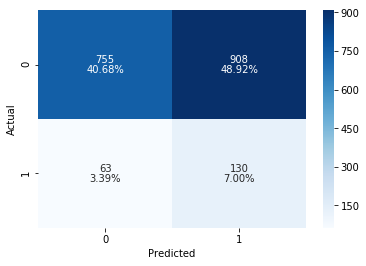

In [36]:
cm(y_test, test_pred2)

In [37]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1663
         1.0       0.96      0.13      0.24       193

    accuracy                           0.91      1856
   macro avg       0.94      0.57      0.59      1856
weighted avg       0.91      0.91      0.88      1856



#### The model works well, but is classifying too many false positives.  
we will try another avenue

### Feature selection

In [87]:
select_feature = SelectKBest(chi2, k=15).fit(X_train_sm, y_train_sm)

In [106]:
select_feature_df = pd.DataFrame({'Feature':list(X_train.columns),
                                 'Scores': select_feature.scores_})
select_feature_df.sort_values(by='Scores', ascending=False )

Feature         Scores
0      WTDRD1  189432.735271
71   DR1TMOIS  182939.481133
94   DR1BWATZ  170083.608710
44     DR1TLZ  118921.478400
68   DR1TCAFF   83239.534146
92   DR1.320Z   75310.355928
41   DR1TBCAR   67717.781100
40   DR1TACAR   23104.143796
59   DR1TCALC   18555.762793
35   DR1TCHOL   11536.204790
66   DR1TPOTA   11221.376317
29   DR1TSUGR    8958.195176
26   DR1TKCAL    8919.875122
1      WTDR2D    8646.200404
50     DR1TFA    7501.894803
18    DRQSDT7    7307.607144
53    DR1TCHL    7182.099068
69   DR1TTHEO    6172.356659
65   DR1TSODI    5303.626702
56     DR1TVC    4400.618553
42   DR1TCRYP    4267.682919
28   DR1TCARB    4002.530360
52   DR1TFDFE    3312.329437
38    DR1TRET    3081.064463
58     DR1TVK    2981.028132
51     DR1TFF    2166.104090
61   DR1TMAGN    2005.402751
70   DR1TALCO    1689.683476
93   DR1.330Z     698.117929
67   DR1TSELE     689.599849
..        ...            ...
100  DRD350BQ       5.232442
3       DRABF       4.614200
48    DR1TVB6       4.501372
76   DR1TS120       4.184183
79   DR1TS180       4.124403
83   DR1TM221       3.801951
91    DR1.300       3.570460
22   DRQSDT11       3.160180
46    DR1TVB2       2.603342
111   DRD350H       2.571897
9      DR1STY       1.598787
47   DR1TNIAC       1.487298
108  DRD350FQ       1.279514
96     DRD340       1.253008
148  DRD370OQ       1.200003
104  DRD350DQ       1.105870
63   DR1TZINC       1.049046
31   DR1TTFAT       0.957827
89   DR1TP225       0.934699
62   DR1TIRON       0.840033
82   DR1TM201       0.760084
88   DR1TP205       0.538160
154  DRD370RQ       0.502585
102  DRD350CQ       0.493171
36   DR1TATOC       0.424950
80   DR1TM161       0.342919
112  DRD350HQ       0.214027
45    DR1TVB1       0.127230
86   DR1TP184       0.101697
16    DRQSDT5            NaN

[162 rows x 2 columns]

In [89]:
X_train_chi = select_feature.transform(X_train_sm)
X_test_chi = select_feature.transform(X_test)

In [90]:
select_feature.get_params()

{'k': 15,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

In [91]:
rf2.fit(X_train_chi, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
train_pred_chi = rf2.predict(X_train_chi)
test_pred_chi = rf2.predict(X_test_chi)

In [93]:
X_train_chi.shape, X_train_sm.shape

((13458, 15), (13458, 162))

Confusion Matrix test: 


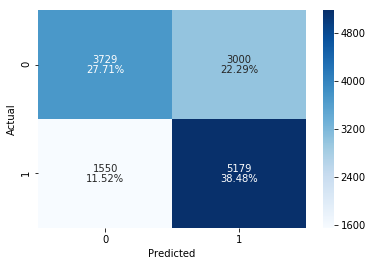

In [94]:
cm(y_train_sm, train_pred_chi)

In [95]:
y_train_preds = rf2.predict_proba(X_train_chi)
y_train_preds

array([[0.62399902, 0.37600098],
       [0.45828141, 0.54171859],
       [0.62399902, 0.37600098],
       ...,
       [0.45368142, 0.54631858],
       [0.46783079, 0.53216921],
       [0.43651303, 0.56348697]])

In [96]:
y_train_preds[np.where(y_test==1)][:, 1].min()

0.37600098169037405

In [101]:
y_train_labels_thresh = get_label(rf2, X_train_chi, .50)

Confusion Matrix test: 


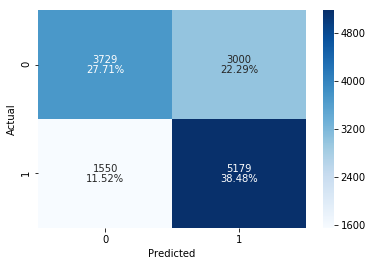

In [102]:
cm(y_train_sm, y_train_labels_thresh)

In [103]:
print(classification_report(y_train_sm, train_pred_chi))

              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62      6729
         1.0       0.63      0.77      0.69      6729

    accuracy                           0.66     13458
   macro avg       0.67      0.66      0.66     13458
weighted avg       0.67      0.66      0.66     13458



In [104]:
print(classification_report(y_test, test_pred_chi))

              precision    recall  f1-score   support

         0.0       0.93      0.53      0.67      1663
         1.0       0.14      0.64      0.22       193

    accuracy                           0.54      1856
   macro avg       0.53      0.58      0.45      1856
weighted avg       0.84      0.54      0.62      1856



### This did not give us the performance we are looking for, so we will try a different classifier

In [108]:
dlist = []
for p in np.linspace(1, 5, 9):
    for n in [2, 3, 4, 5, 6,]:
        d = {}
        d['p'] = p
        d['n'] = n
        knn = KNeighborsClassifier(n_neighbors=n, p=p)
        knn.fit(X_train_sm, y_train_sm)
        score_test = knn.score(X_test, y_test)
        score_train = knn.score(X_train_sm, y_train_sm)
        score_ratio = min([score_train/score_test, score_test/score_train])
        d['score'] = score_test
        d['score_ratio'] = score_ratio
        dlist.append(d)
        
score_df = pd.DataFrame(dlist)
score_df.sort_values(by=['score_ratio', 'score'], ascending=False, inplace=True)
score_df.head(10)

n    p     score  score_ratio
0   2  1.0  0.791487     0.837803
27  4  3.5  0.734375     0.836781
37  4  4.5  0.733297     0.835978
42  4  5.0  0.732759     0.835151
32  4  4.0  0.731142     0.833097
2   4  1.0  0.743534     0.833041
17  4  2.5  0.732759     0.831981
22  4  3.0  0.728987     0.830009
40  2  5.0  0.777478     0.829828
20  2  3.0  0.778556     0.829203

In [116]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_sm)
X_scaled_test = scaler.transform(X_test)


In [117]:
knn = KNeighborsClassifier(n_neighbors=2, p=2.5)
knn.fit(X_scaled_train, y_train_sm)

print(knn.score(X_scaled_test, y_test))

0.8205818965517241


In [56]:
dlist2 = []
for p in np.linspace(1, 5, 9):
    for n in [2, 3, 4, 5, 6,]:
        d = {}
        d['p'] = p
        d['n'] = n
        knn = KNeighborsClassifier(n_neighbors=n, p=p)
        knn.fit(X_scaled_train, y_train_sm)
        score_test = knn.score(X_scaled_test, y_test)
        score_train = knn.score(X_scaled_train, y_train_sm)
        score_ratio = min([score_train/score_test, score_test/score_train])
        d['score'] = score_test
        d['score_ratio'] = score_ratio
        dlist2.append(d)
        
score_df2 = pd.DataFrame(dlist2)
score_df2.sort_values(by=['score_ratio', 'score'], ascending=False, inplace=True)
score_df2.head(10)

n    p     score  score_ratio
4   6  1.0  0.861530     0.926594
2   4  1.0  0.856142     0.913861
0   2  1.0  0.869073     0.913036
3   5  1.0  0.840517     0.910104
9   6  1.5  0.816272     0.897132
5   2  1.5  0.853987     0.896976
1   3  1.0  0.835129     0.896766
7   4  1.5  0.820582     0.885597
10  2  2.0  0.835129     0.877169
8   5  1.5  0.788793     0.875512

In [132]:
knn = KNeighborsClassifier(n_neighbors=4, p=1)
knn.fit(X_scaled_train, y_train_sm)

print(knn.score(X_scaled_test, y_test))

0.8561422413793104


In [133]:
train_pred_scale = knn.predict(X_scaled_train)
test_pred_scale = knn.predict(X_scaled_test)

Confusion Matrix test: 


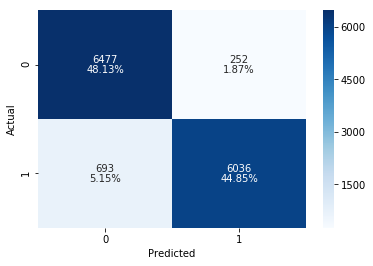

In [131]:
cm( y_train_sm, train_pred_scale)

Confusion Matrix test: 


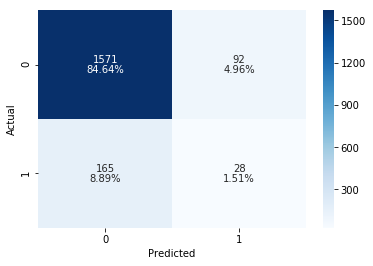

In [120]:
cm( y_test, test_pred_scale)

### This looks good, but we will try one more classifier

#### Here we will try a Support Vector Machine

In [121]:
clf = svm.SVC()
clf.fit(X_scaled_train, y_train_sm)

accuracy = clf.score(X_scaled_test, y_test)
print(accuracy)

0.8890086206896551


In [122]:
X_scaled_pred_svm = clf.predict(X_scaled_test)

Confusion Matrix test: 


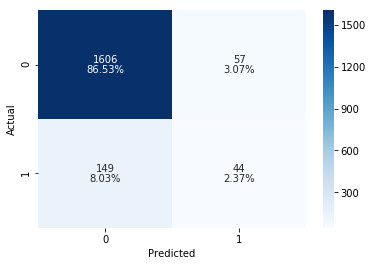

In [123]:
cm(y_test, X_scaled_pred_svm)

In [124]:
params = {"C":[1, 2, 3],
          "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}

clf_svm = GridSearchCV(clf, params, scoring=make_scorer(recall_score))

In [126]:
clf_svm.fit(X_scaled_train, y_train_sm)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score), verbose=0)

In [127]:
clf_svm.best_params_

{'C': 3, 'kernel': 'rbf'}

In [128]:
clf = svm.SVC(C=3, kernel='rbf')
clf.fit(X_train_chi, y_train_sm)

accuracy = clf.score(X_test_chi, y_test)
print(accuracy)

0.5824353448275862


In [129]:
X_scaled_pred_svm = clf.predict(X_test_chi)

Confusion Matrix test: 


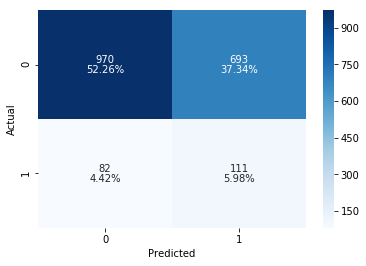

In [130]:
cm(y_test, X_scaled_pred_svm)